In [1]:
import sys
import string
import itertools
from collections import Counter, defaultdict
import re

from pathlib import Path
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = Path('../data/day_05.txt').read_text()

In [3]:
lines = [[*map(int, re.findall(r'[0-9]+', k))] for k in data.splitlines()]

In [4]:
%%timeit

grid = Counter()

for x1, y1, x2, y2 in lines:
    if x1 == x2:
        y1, y2 = sorted([y1, y2])
        for y in range(y1, y2 + 1):
            grid[(x1, y)] += 1

    elif y1 == y2:
        x1, x2 = sorted([x1, x2])
        for x in range(x1, x2 + 1):
            grid[(x, y1)] += 1

sum([k > 1 for k in grid.values()])

37 ms ± 2.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
# %%timeit

grid = Counter()

for x1, y1, x2, y2 in lines:
    if x1 == x2:
        y1, y2 = sorted([y1, y2])
        for y in range(y1, y2 + 1):
            grid[(x1, y)] += 1

    elif y1 == y2:
        x1, x2 = sorted([x1, x2])
        for x in range(x1, x2 + 1):
            grid[(x, y1)] += 1

    else:
        xrange = range(x1, x2 + 1) if x2 > x1 else range(x1, x2 - 1, -1)
        yrange = range(y1, y2 + 1) if y2 > y1 else range(y1, y2 - 1, -1)

        for x, y in zip(xrange, yrange):
            grid[(x, y)] += 1

sum([v > 1 for v in grid.values()])

19939

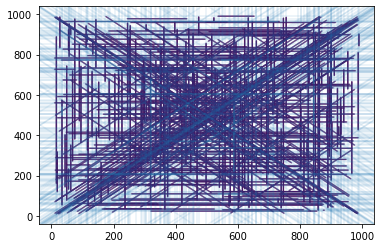

In [6]:
for x1, y1, x2, y2 in lines:
    plt.axline((x1, y1), (x2, y2), alpha=0.1)
    
d = [(k,v,c) for (k,v),c in grid.items()]
xs, ys, cs = zip(*d)
plt.scatter(xs, ys, s=0.1, alpha=0.5, c=cs)
plt.show()